# Analyzing nba stats to find average Field Goal percentage pro team, Top10 players by field golas pro min and build a model predicting player impact based on player´s stats with Stochastic Gradient Descent

## Data set & description : https://www.kaggle.com/datasets/lukedip/nba-boxscore-dataset

In [1]:
#libriaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import sqlite3 

In [2]:
#connecting sql database
con = sqlite3.connect('NBA-Boxscore-Database.sqlite')
cur = con.cursor()

In [3]:
#getting first data 
df = cur.execute('''SELECT team,
                    avg(FGp) AS goal_percentage 
                    FROM team_stats
                    GROUP BY team 
                    ORDER BY goal_percentage DESC;
                ''')
res = cur.fetchall()

res[0]

('GSW', 0.4787326607818415)

In [4]:
#getting all teams abbreviation
df.execute('SELECT team from team_stats GROUP BY team')
cur.fetchall()

[('ATL',),
 ('BOS',),
 ('BRK',),
 ('CHA',),
 ('CHI',),
 ('CHO',),
 ('CLE',),
 ('DAL',),
 ('DEN',),
 ('DET',),
 ('GSW',),
 ('HOU',),
 ('IND',),
 ('LAC',),
 ('LAL',),
 ('MEM',),
 ('MIA',),
 ('MIL',),
 ('MIN',),
 ('NOP',),
 ('NYK',),
 ('OKC',),
 ('ORL',),
 ('PHI',),
 ('PHO',),
 ('POR',),
 ('SAC',),
 ('SAS',),
 ('TOR',),
 ('UTA',),
 ('WAS',)]

In [5]:
#unpucking list
teams, averages = zip(*res)

#nba color team accordingly to the team abbreviation
team_color_data = [
    ('ATL', 'Atlanta Hawks', 'red'),
    ('BOS', 'Boston Celtics', 'green'),
    ('BRK', 'Brooklyn Nets', 'black'),
    ('CHA', 'Charlotte Hornets', 'teal'),
    ('CHI', 'Chicago Bulls', 'red'),
    ('CHO', 'Charlotte Hornets', 'teal'),
    ('CLE', 'Cleveland Cavaliers', 'red'),
    ('DAL', 'Dallas Mavericks', 'blue'),
    ('DEN', 'Denver Nuggets', 'yellow'),
    ('DET', 'Detroit Pistons', 'red'),
    ('GSW', 'Golden State Warriors', 'blue'),
    ('HOU', 'Houston Rockets', 'red'),
    ('IND', 'Indiana Pacers', 'gold'),
    ('LAC', 'Los Angeles Clippers', 'red'),
    ('LAL', 'Los Angeles Lakers', 'purple'),
    ('MEM', 'Memphis Grizzlies', 'navy'),
    ('MIA', 'Miami Heat', 'black'),
    ('MIL', 'Milwaukee Bucks', 'green'),
    ('MIN', 'Minnesota Timberwolves', 'blue'),
    ('NOP', 'New Orleans Pelicans', 'purple'),
    ('NYK', 'New York Knicks', 'orange'),
    ('OKC', 'Oklahoma City Thunder', 'blue'),
    ('ORL', 'Orlando Magic', 'blue'),
    ('PHI', 'Philadelphia 76ers', 'blue'),
    ('PHO', 'Phoenix Suns', 'purple'),
    ('POR', 'Portland Trail Blazers', 'red'),
    ('SAC', 'Sacramento Kings', 'purple'),
    ('SAS', 'San Antonio Spurs', 'silver'),
    ('TOR', 'Toronto Raptors', 'red'),
    ('UTA', 'Utah Jazz', 'navy'),
    ('WAS', 'Washington Wizards', 'red')
]

#unpucking color list
team_abbrs, team_names, team_colors = zip(*team_color_data)

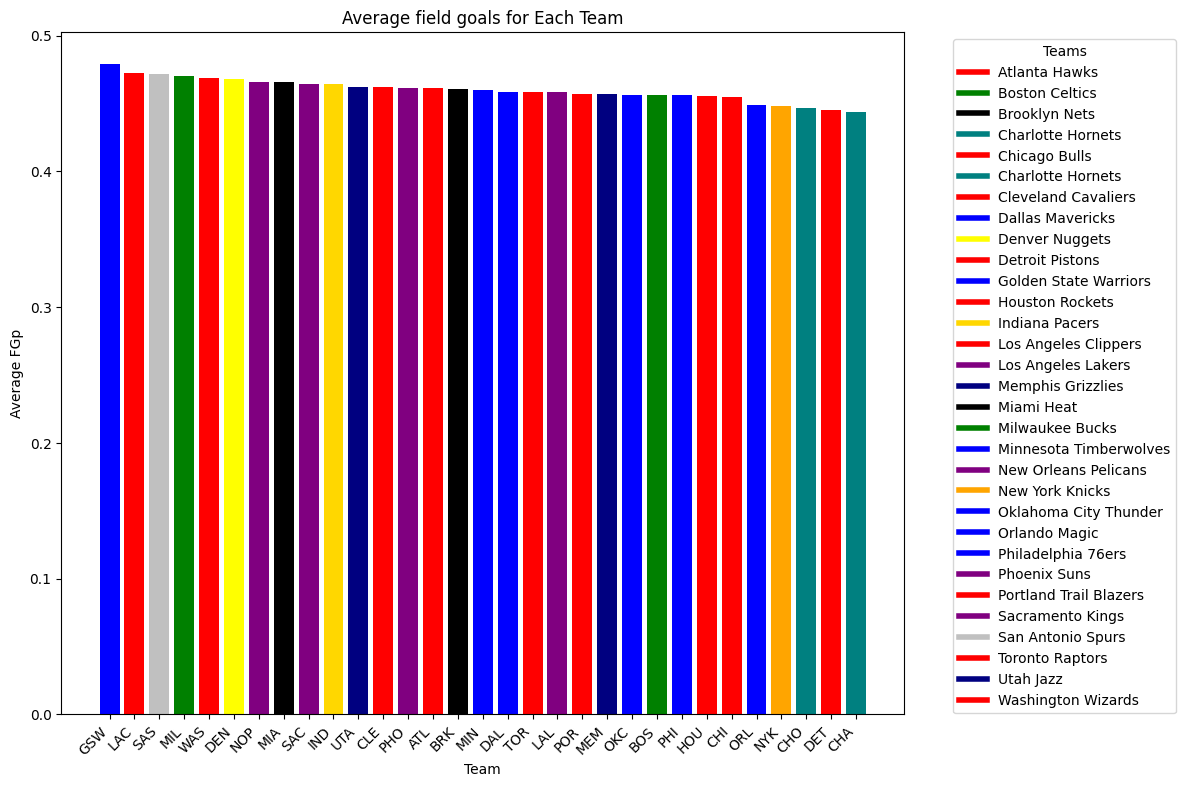

In [6]:
# Extract colors for each team using the provided list
colors = [team_colors[team_abbrs.index(team)] for team in teams]

# Plotting
plt.figure(figsize=(12, 8))
bars = plt.bar(teams, averages, color=colors)
plt.title('Average field goals for Each Team')
plt.xlabel('Team')
plt.ylabel('Average FGp')
plt.xticks(rotation=45, ha='right')  # Rotating team names for better visibility

# Adding legend for team colors
legend_labels = [plt.Line2D([0], [0], color=team_colors[i], lw=4, label=team_names[i]) for i in range(len(team_names))]
plt.legend(handles=legend_labels, title='Teams', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()

# Display the plot
plt.show()

In [7]:
#getting personal players stats
query = ('''SELECT player,
                   team,
                   MP as minutes_played,
                   FG as field_goal,
                   FGp as field_goal_per,
                   ORtg as offensive_rating,
                   PIE as player_impact_score
            FROM player_stats''')

df = pd.read_sql_query(query,con)

In [8]:
df.head()

,player,team,minutes_played,field_goal,field_goal_per,offensive_rating,player_impact_score
0,Arron Afflalo,ORL,32:59,3.0,0.214,69.0,-1.1
1,Nikola Vučević,ORL,30:39,4.0,0.364,70.0,3.8
2,Jameer Nelson,ORL,30:34,4.0,0.308,102.0,10.3
3,Jason Maxiell,ORL,26:19,0.0,0.000,8.0,-1.9
4,Maurice Harkless,ORL,23:30,6.0,0.462,111.0,2.7


In [9]:
df['minutes_played'].value_counts()

minutes_played
Did Not Play     45260
Did Not Dress     5407
Not With Team     1504
12:00              724
24:00              202
                 ...  
49:49                1
50:22                1
47:46                1
47:28                1
52:42                1
Name: count, Length: 3029, dtype: int64

In [10]:
#Cleaning

# Filter out rows with specified values in 'minutes_played'
df = df[~df['minutes_played'].isin(['Not With Team', 'Did Not Dress', 'Did Not Play','Player Suspended'])]

# Convert 'minutes_played' to rounded float values
df['minutes_played'] = df['minutes_played'].apply(lambda x: round(float(x.split(':')[0]) + float(x.split(':')[1]) / 60, 2))

# Calculate 'field_goal_per_min' for each player
df['field_goal_per_min'] = df['field_goal'] / df['minutes_played']

In [11]:
df

,player,team,minutes_played,field_goal,field_goal_per,offensive_rating,player_impact_score,field_goal_per_min
0,Arron Afflalo,ORL,32.98,3.0,0.214,69.0,-1.1,0.090964
1,Nikola Vučević,ORL,30.65,4.0,0.364,70.0,3.8,0.130506
2,Jameer Nelson,ORL,30.57,4.0,0.308,102.0,10.3,0.130847
3,Jason Maxiell,ORL,26.32,0.0,0.000,8.0,-1.9,0.000000
4,Maurice Harkless,ORL,23.50,6.0,0.462,111.0,2.7,0.255319
...,...,...,...,...,...,...,...,...
305725,Trendon Watford,POR,19.63,4.0,0.500,91.0,3.5,0.203770
305726,Justin Minaya,POR,23.78,1.0,0.125,27.0,-0.9,0.042052
305727,John Butler,POR,22.02,1.0,0.200,58.0,-0.7,0.045413
305728,Chance Comanche,POR,20.78,3.0,0.600,110.0,1.7,0.144370


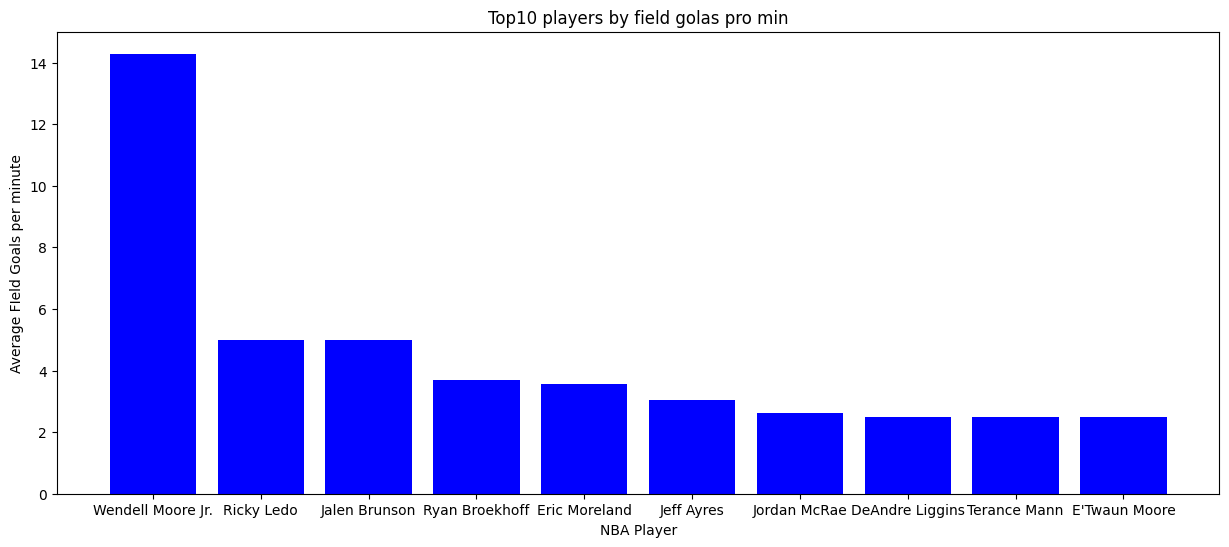

In [12]:
# Exclude players with 0 in 'field_goal_per_min'
df_filtered = df[df['field_goal_per_min'] != 0]

# Sort DataFrame based on 'field_goal_per_min' in descending order and take the top 10
df_top10 = df_filtered.sort_values(by='field_goal_per_min', ascending=False).head(10)

# Plotting
plt.figure(figsize=(15, 6))
plt.bar(df_top10['player'],df_top10['field_goal_per_min'],color='blue')
plt.title('Top10 players by field golas pro min')
plt.xlabel('NBA Player')
plt.ylabel('Average FIeld Goals per minute')
 
plt.show()  

In [13]:
#getting players stats for a mashine learning model

query = ('''SELECT TRB as total_rebounds,
                   AST as assists,
                   STL as steals,
                   BLK as blocks,
                   PTS as points,
                   TSp as true_shoot_per,
                   FGp as field_goal_per,
                   DRTg as defensive_rating,
                   ORtg as offensive_rating,
                   PIE as player_impact_score
            FROM player_stats''')

df = pd.read_sql_query(query,con)

In [14]:
df

,total_rebounds,assists,steals,blocks,points,true_shoot_per,field_goal_per,defensive_rating,offensive_rating,player_impact_score
0,3.0,1.0,0.0,0.0,9.0,0.294,0.214,111.0,69.0,-1.1
1,10.0,3.0,2.0,1.0,8.0,0.364,0.364,98.0,70.0,3.8
2,5.0,7.0,2.0,0.0,12.0,0.446,0.308,101.0,102.0,10.3
3,5.0,0.0,1.0,2.0,0.0,0.000,0.000,99.0,8.0,-1.9
4,1.0,0.0,1.0,0.0,14.0,0.521,0.462,107.0,111.0,2.7
...,...,...,...,...,...,...,...,...,...,...
305727,1.0,0.0,0.0,0.0,3.0,0.300,0.200,149.0,58.0,-0.7
305728,3.0,0.0,0.0,1.0,7.0,0.518,0.600,146.0,110.0,1.7
305729,3.0,0.0,0.0,0.0,9.0,0.654,0.667,147.0,89.0,2.6
305730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df = df.dropna()

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 241238 entries, 0 to 305729
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   total_rebounds       241238 non-null  float64
 1   assists              241238 non-null  float64
 2   steals               241238 non-null  float64
 3   blocks               241238 non-null  float64
 4   points               241238 non-null  float64
 5   true_shoot_per       241238 non-null  float64
 6   field_goal_per       241238 non-null  float64
 7   defensive_rating     241238 non-null  float64
 8   offensive_rating     241238 non-null  float64
 9   player_impact_score  241238 non-null  float64
dtypes: float64(10)
memory usage: 20.2 MB


In [17]:
# Find the biggest and smallest values for each column
max_values = df.max()
min_values = df.min()

# Print the results for each column
for column in df.columns:
    print(f"The biggest value in '{column}': {max_values[column]}")
    print(f"The smallest value in '{column}': {min_values[column]}")
    print()

The biggest value in 'total_rebounds': 30.0
The smallest value in 'total_rebounds': 0.0

The biggest value in 'assists': 25.0
The smallest value in 'assists': 0.0

The biggest value in 'steals': 10.0
The smallest value in 'steals': 0.0

The biggest value in 'blocks': 12.0
The smallest value in 'blocks': 0.0

The biggest value in 'points': 71.0
The smallest value in 'points': 0.0

The biggest value in 'true_shoot_per': 1.5
The smallest value in 'true_shoot_per': 0.0

The biggest value in 'field_goal_per': 1.0
The smallest value in 'field_goal_per': 0.0

The biggest value in 'defensive_rating': 162.0
The smallest value in 'defensive_rating': -149.0

The biggest value in 'offensive_rating': 300.0
The smallest value in 'offensive_rating': 0.0

The biggest value in 'player_impact_score': 38.4
The smallest value in 'player_impact_score': -13.4



In [18]:
# Set a seed for reproducibility
np.random.seed(42)

# Generate a DataFrame with random values
test_data = {
    'total_rebounds': np.random.uniform(0, 30, 100),  
    'assists': np.random.uniform(0, 25, 100),  
    'steals': np.random.uniform(0, 10, 100),  
    'blocks': np.random.uniform(0, 12, 100), 
    'points': np.random.uniform(0, 71, 100),  
    'true_shoot_per': np.random.uniform(0, 1.5, 100),  
    'field_goal_per': np.random.uniform(0, 1, 100),  
    'defensive_rating': np.random.uniform(-149, 162, 100), 
    'offensive_rating': np.random.uniform(0, 300, 100)
}

test=pd.DataFrame(test_data)


In [19]:
test

,total_rebounds,assists,steals,blocks,points,true_shoot_per,field_goal_per,defensive_rating,offensive_rating
0,11.236204,0.785730,6.420316,0.620181,7.321795,1.047243,0.168935,16.635314,212.171590
1,28.521429,15.910260,0.841400,6.376256,64.081256,0.804145,0.278590,-132.882880,45.761713
2,21.959818,7.858900,1.616287,6.487621,35.872918,0.464291,0.177010,-44.316069,172.886508
3,17.959755,12.714267,8.985542,7.649159,58.678480,1.220693,0.088703,-107.197035,182.014514
4,4.680559,22.689162,6.064291,8.713096,22.723522,1.027097,0.120636,-129.290384,127.239201
...,...,...,...,...,...,...,...,...,...
95,14.813868,8.730239,5.222433,11.169088,25.088008,0.710942,0.610620,122.230536,61.495289
96,15.681985,18.148892,7.699936,10.300953,41.439584,1.001337,0.288631,140.888786,87.944319
97,12.826231,22.427756,2.158210,5.147928,5.519159,0.258480,0.581238,26.756420,268.900746
98,0.762574,22.177161,6.228905,9.010453,69.182031,0.288434,0.154363,67.658406,3.900577


In [20]:
X=df.drop('player_impact_score',axis=1)
y=df['player_impact_score']

In [21]:
#building,tuning and evaluating a model


from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.linear_model import SGDRegressor

param_distributions = {'loss': ['huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'],
                       'penalty': ['l2', 'l1', 'elasticnet'],
                       'alpha': uniform(0, 0.1),
                       'l1_ratio': uniform(0, 1),
                       'fit_intercept': [True, False],
                       'max_iter': [1000, 2000, 5000],
                       'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
                       'eta0': uniform(0, 0.1),
                       'power_t': uniform(0, 1)}

# Define the model to use
sgd = SGDRegressor(random_state=42)

sgd_cv = RandomizedSearchCV(sgd, param_distributions, cv=5, n_iter=20, scoring='r2',random_state=101)

# Perform the search
sgd_cv.fit(X, y)

# Print the best hyperparameters
print(f"Best SGDRegressor hyperparameters: {sgd_cv.best_params_}")
print(f"Best SGDRegressor CV R2 score: {sgd_cv.best_score_}")

/home/anton/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/anton/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/anton/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/anton/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/anton/.local/lib/python3.10/si

Best SGDRegressor hyperparameters: {'alpha': 0.05163986277024462, 'eta0': 0.05706675868681398, 'fit_intercept': False, 'l1_ratio': 0.9844476146364335, 'learning_rate': 'adaptive', 'loss': 'epsilon_insensitive', 'max_iter': 2000, 'penalty': 'l2', 'power_t': 0.3069662196722378}
Best SGDRegressor CV R2 score: 0.8714860108236568
